# Homework 1

`airbnb.csv` 데이터셋은 airbnb에 등록된 샌프란시스코 지역의 listing 데이터의 일부이다. 

- 'id': listing id
- 'room_type': 집 또는 방의 형태 (entire home/apt, private room, shared room)
- 'number_of_reviews': 총 리뷰 수
- 'review_scores_rating': 전체 리뷰 점수 
- 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value': 각 부분의 리뷰 점수
- 'reviews_per_month': 월 평균 리뷰 수 
- 'Downtown': Downtown까지의 거리 
- 'PerCapitaIncome': 해당 지역의 소득수준
- 'most_freq_aspect': listing description에서 가장 많이 나타난 주제

아래의 질문에 답하기 위해 적절한 통계량/그래프를 출력하고 서술하시오. 완성된 답안은 **html** 파일로 다운받아 제출하시오. (File>Download as>HTML)


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt
data = pd.read_csv('./data/airbnb.csv')

In [3]:
data

,id,room_type,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Downtown,PerCapitaIncome,most_freq_aspect
0,958,Entire home/apt,222.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.77,4068.132073,110777,int_style
1,3850,Private room,167.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.33,6792.053605,93008,comm
2,5858,Entire home/apt,111.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,0.87,5666.128342,69778,nature
3,7918,Private room,18.0,86.0,8.0,8.0,9.0,9.0,9.0,8.0,0.15,5573.866947,99041,comm
4,8142,Private room,8.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.13,5632.882874,99041,comm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6100,39413362,Private room,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,7703.704979,75119,bldg
6101,39652916,Private room,1.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00,5506.885308,61740,bldg
6102,39654300,Entire home/apt,1.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00,5354.254655,61740,nbhd
6103,39704725,Private room,1.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00,7646.091834,45475,bldg


#### 1. 데이터가 포함한 다음 변수의 종류를 구분하시오.
- id
- room_type
- number_of_reviews
- Downtown
- most_freq_aspect

In [4]:
data_id = data.id.copy()
data_id

0            958
1           3850
2           5858
3           7918
4           8142
          ...   
6100    39413362
6101    39652916
6102    39654300
6103    39704725
6104    29009564
Name: id, Length: 6105, dtype: int64

In [5]:
data_id.value_counts()

958         1
23293404    1
23314035    1
23313532    1
23313242    1
           ..
9926871     1
9925099     1
9924449     1
9910056     1
29009564    1
Name: id, Length: 6105, dtype: int64

In [6]:
data.loc[:,"id"]

0            958
1           3850
2           5858
3           7918
4           8142
          ...   
6100    39413362
6101    39652916
6102    39654300
6103    39704725
6104    29009564
Name: id, Length: 6105, dtype: int64

In [7]:
data_room = data.loc[:, "room_type"]

In [8]:
data_room.value_counts()

Entire home/apt    3557
Private room       2396
Shared room         152
Name: room_type, dtype: int64

In [9]:
data_number = data.loc[:, "number_of_reviews"]
data_number.value_counts()

1.0      583
2.0      390
3.0      260
4.0      205
5.0      162
        ... 
403.0      1
426.0      1
255.0      1
191.0      1
438.0      1
Name: number_of_reviews, Length: 411, dtype: int64

In [10]:
data_down = data.loc[:, "Downtown"]
data_down.value_counts()

4068.132073    1
1092.051026    1
9846.110631    1
9768.668089    1
1063.819935    1
              ..
7537.634569    1
3876.723034    1
4215.558581    1
3382.901110    1
524.506491     1
Name: Downtown, Length: 6105, dtype: int64

In [11]:
data_most_freq = data.loc[:, "most_freq_aspect"]
data_most_freq.value_counts()

comm          1187
bldg           911
int_style      802
nbhd           683
attr_trans     658
facil          498
visitor        479
nature         357
bedroom        326
kitchen        204
Name: most_freq_aspect, dtype: int64

#### 2. `reviews_per_month`의 평균, 중위수를 계산하고 비교하여 분포의 모양을 추측해보시오. 

In [12]:
data_reviews = data.loc[:, "reviews_per_month"]
data_reviews.describe()

count    6105.000000
mean        1.888251
std         2.089904
min         0.010000
25%         0.310000
50%         1.030000
75%         2.870000
max        18.000000
Name: reviews_per_month, dtype: float64

(array([3.843e+03, 1.105e+03, 6.610e+02, 3.250e+02, 1.260e+02, 3.900e+01,
        5.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e-02, 1.8090e+00, 3.6080e+00, 5.4070e+00, 7.2060e+00,
        9.0050e+00, 1.0804e+01, 1.2603e+01, 1.4402e+01, 1.6201e+01,
        1.8000e+01]),
 <BarContainer object of 10 artists>)

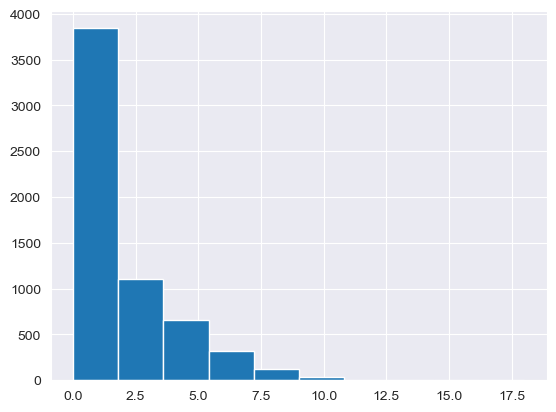

In [13]:
plt.hist(data_reviews)

#### 3. `reviews_per_month`의 히스토그램을 통해 위에서 추측한 사실이 맞는지 확인해보시오. 

(array([3.843e+03, 1.105e+03, 6.610e+02, 3.250e+02, 1.260e+02, 3.900e+01,
        5.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e-02, 1.8090e+00, 3.6080e+00, 5.4070e+00, 7.2060e+00,
        9.0050e+00, 1.0804e+01, 1.2603e+01, 1.4402e+01, 1.6201e+01,
        1.8000e+01]),
 <BarContainer object of 10 artists>)

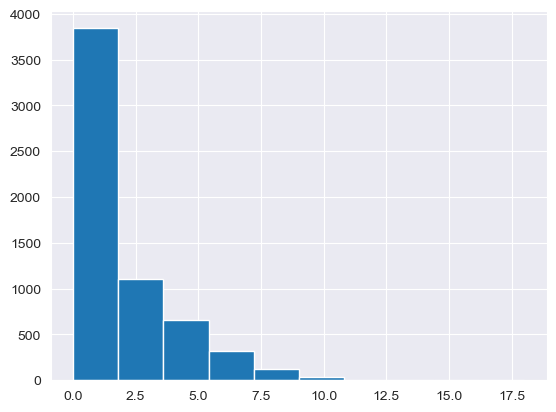

In [14]:
plt.hist(data_reviews)


#### 4. `reviews_per_month`의 평균과 중위수를 각 `room_type`별로 계산하여 비교하시오.

In [15]:
data['reviews_per_month'].groupby(data['room_type']).median()

room_type
Entire home/apt    0.750
Private room       1.815
Shared room        0.735
Name: reviews_per_month, dtype: float64

In [16]:
data['reviews_per_month'].groupby(data['room_type']).mean()

room_type
Entire home/apt    1.530804
Private room       2.434912
Shared room        1.635855
Name: reviews_per_month, dtype: float64

#### 5. `reviews_per_month`의 Boxplot을  `room_type`별로 그려서 비교하시오.

In [ ]:
data_review_room = data['reviews_per_month'].groupby(data['room_type'])


In [ ]:

# Create a boxplot of data_review_room
plt.boxplot([data_review_room.get_group('Entire home/apt').dropna(),
             data_review_room.get_group('Private room').dropna(),
             data_review_room.get_group('Shared room').dropna()])

# Set the x-axis tick labels
plt.xticks([1, 2, 3], ['Entire home/apt', 'Private room', 'Shared room'])

# Set the axis labels and title
plt.xlabel('Room Type')
plt.ylabel('Reviews per Month')
plt.title('Boxplot of Reviews per Month by Room Type')

# Show the plot
plt.show()


#### 6. `most_freq_aspect`의 도수분포표를 출력하고 이를 활용해 bar plot을 그려서 어떤 aspect가 가장 빈번하게 나타났는지 확인하시오.

In [ ]:
data_freq_count = data_most_freq.value_counts()
data_freq_count

In [ ]:

data_freq_count.plot(x=data_freq_count.index,kind='bar')


#### 7. `room_type`과 `most_freq_aspect`의 mosaic plot을 통해 room type에 따라 자주 나타나는 aspect의 특징이 다른지 비교하시오.

In [ ]:
data.most_freq_aspect.value_counts()

In [ ]:
data.most_freq_aspect = data.most_freq_aspect.astype('category')

In [ ]:
data.dtypes

In [ ]:
data.most_freq_aspect.cat.reorder_categories()

In [ ]:
data.most_freq_aspect.value_counts().index.to_list()

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(data.sort_values('most_freq_aspect'), ['room_type', 'most_freq_aspect'])

plt.show()

#### 8. 7개의 review_scores 변수들과 `Downtown`, `PerCapitaIncome`, `reviews_per_month` 변수와의 상관계수 행렬과 그것의 heatmap을 통해 변수들 간의 상관관계를 관찰하고 서술하시오.

In [ ]:
data.loc[:, ['Downtown']]

In [39]:
data.most_freq_aspect = data.most_freq_aspect.astype('category')

In [41]:
data.dtypes

id                                int64
room_type                        object
number_of_reviews               float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
reviews_per_month               float64
Downtown                        float64
PerCapitaIncome                   int64
most_freq_aspect               category
dtype: object

In [ ]:
data.most_freq_aspect.cat.reorder_categories()

In [42]:
data.most_freq_aspect.value_counts().index.to_list()

['comm',
 'bldg',
 'int_style',
 'nbhd',
 'attr_trans',
 'facil',
 'visitor',
 'nature',
 'bedroom',
 'kitchen']

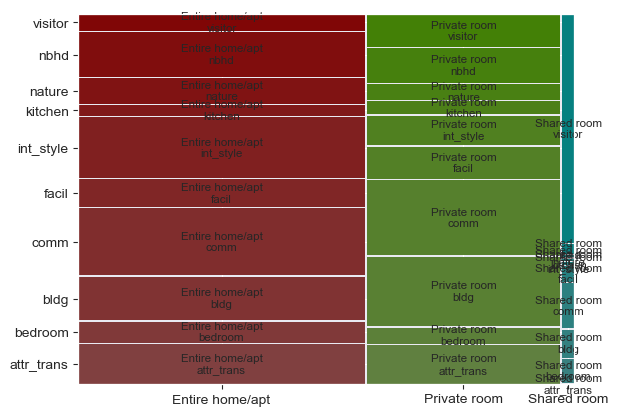

In [34]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(data.sort_values('most_freq_aspect'), ['room_type', 'most_freq_aspect'])

plt.show()

#### 8. 7개의 review_scores 변수들과 `Downtown`, `PerCapitaIncome`, `reviews_per_month` 변수와의 상관계수 행렬과 그것의 heatmap을 통해 변수들 간의 상관관계를 관찰하고 서술하시오.

In [44]:
data.loc[:, ['Downtown']]

,Downtown
0,4068.132073
1,6792.053605
2,5666.128342
3,5573.866947
4,5632.882874
...,...
6100,7703.704979
6101,5506.885308
6102,5354.254655
6103,7646.091834


In [22]:
seven_score = data.iloc[:, 3:10 ]

In [23]:
three_score = data.loc[:, ["Downtown", "PerCapitaIncome", "reviews_per_month"]]

In [24]:
seven_score.dropna(inplace=True)

In [25]:
three_score.dropna(inplace=True)

In [26]:
corr_matrix = seven_score.corrwith(three_score)

In [37]:
print(corr_matrix)

Downtown                      NaN
PerCapitaIncome               NaN
review_scores_accuracy        NaN
review_scores_checkin         NaN
review_scores_cleanliness     NaN
review_scores_communication   NaN
review_scores_location        NaN
review_scores_rating          NaN
review_scores_value           NaN
reviews_per_month             NaN
dtype: float64


In [28]:
three_score[['Downtown']].corrwith(seven_score)

Downtown                      NaN
review_scores_accuracy        NaN
review_scores_checkin         NaN
review_scores_cleanliness     NaN
review_scores_communication   NaN
review_scores_location        NaN
review_scores_rating          NaN
review_scores_value           NaN
dtype: float64

In [29]:
print(three_score.dtypes)

Downtown             float64
PerCapitaIncome        int64
reviews_per_month    float64
dtype: object


In [30]:
three_score = three_score.astype("float64")

In [31]:
three_score_1 = three_score.iloc[:6064,:]

In [32]:
three_score_1.corrwith(seven_score)

Downtown                      NaN
PerCapitaIncome               NaN
review_scores_accuracy        NaN
review_scores_checkin         NaN
review_scores_cleanliness     NaN
review_scores_communication   NaN
review_scores_location        NaN
review_scores_rating          NaN
review_scores_value           NaN
reviews_per_month             NaN
dtype: float64

C:\Users\ppjjh\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\ppjjh\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


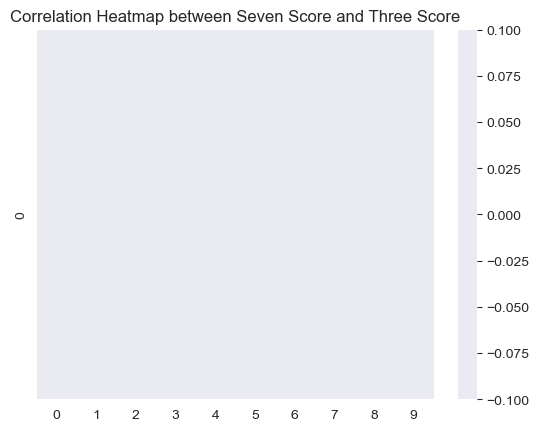

In [33]:

# calculate the correlation matrix between the two dataframes
corr_matrix = seven_score.corrwith(three_score)

# convert the correlation matrix to a 2D numpy array
corr_array = corr_matrix.to_numpy().reshape(1,-1)

# create a heatmap of the correlation matrix
sns.heatmap(corr_array,
            # annot=True,
            cmap='coolwarm', center=0)

# set the title of the heatmap
plt.title('Correlation Heatmap between Seven Score and Three Score')

# show the heatmap
plt.show()
